In [1]:
# 🧠 RICE DEMAND PREDICTION SYSTEM - SUKKUR REGION
# Created by: TITAN Sukkur | AI Batch-1
# Instructor: Shahnawaz Qureshi
# --------------------------------------------------------------
# Objective:
# This notebook demonstrates how to build a Machine Learning model
# to predict rice market demand scores (1–5) for different rice types
# in the Sukkur region using synthetic data.
# --------------------------------------------------------------

# ==============================================================
# 1️⃣ IMPORT LIBRARIES
# ==============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import joblib

In [2]:

# Make plots look nicer
sns.set(style="whitegrid", palette="muted")

# ==============================================================
# 2️⃣ LOAD THE SYNTHETIC DATASET
# ==============================================================

# Read the CSV file (make sure it's in your current working directory)
df = pd.read_csv("synthetic_rice_demand_sukkur.csv")

In [3]:
# Display basic info about the dataset
print("Dataset Shape:", df.shape)
print("\nColumn Names:", df.columns.tolist())
print("\nMissing Values:\n", df.isnull().sum())

# Show first few rows
df.head()


Dataset Shape: (180, 12)

Column Names: ['Date', 'Rice_Type', 'Avg_Price_PKR', 'Demand_Tons', 'Supply_Tons', 'Rainfall_mm', 'Temp_C', 'Fertilizer_Cost_PKR', 'Fuel_Price_PKR', 'Export_Index', 'Harvest_Season', 'Market_Demand_Score']

Missing Values:
 Date                   0
Rice_Type              0
Avg_Price_PKR          0
Demand_Tons            0
Supply_Tons            0
Rainfall_mm            0
Temp_C                 0
Fertilizer_Cost_PKR    0
Fuel_Price_PKR         0
Export_Index           0
Harvest_Season         0
Market_Demand_Score    0
dtype: int64


,Date,Rice_Type,Avg_Price_PKR,Demand_Tons,Supply_Tons,Rainfall_mm,Temp_C,Fertilizer_Cost_PKR,Fuel_Price_PKR,Export_Index,Harvest_Season,Market_Demand_Score
0,2020-01-31,Basmati,4229.716411,898.618164,1010.380132,56.181018,39.112858,6329.984855,309.865848,0.309213,0,3.0
1,2020-01-31,IRRI,4343.298140,1299.680497,1347.636187,106.210887,22.370521,6924.774630,333.244264,0.348637,0,4.0
2,2020-01-31,Hybrid,4566.192165,1068.398641,1090.405567,45.636336,31.445616,5579.862547,279.122914,0.628297,0,4.0
3,2020-02-29,Basmati,4463.856749,955.461952,1021.998937,54.954276,30.209260,6462.939903,269.967378,0.559964,0,4.0
4,2020-02-29,IRRI,4726.117061,1364.468757,1480.067094,91.131728,25.069434,4662.628982,344.888554,0.875942,0,5.0


# ==============================================================
# 3️⃣ FEATURE ENGINEERING
# ==============================================================

In [4]:
# Convert the 'Date' column to datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Extract month and year to capture seasonality
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Calculate Demand-Supply gap (positive = shortage, negative = surplus)
df['Demand_Supply_Gap'] = df['Demand_Tons'] - df['Supply_Tons']

# Calculate percentage change in price (month-to-month)
df['Price_Change_Pct'] = df.groupby('Rice_Type')['Avg_Price_PKR'].pct_change().fillna(0)

# Encode 'Rice_Type' as dummy variables (one-hot encoding)
df = pd.get_dummies(df, columns=['Rice_Type'], drop_first=True)

# Check the updated DataFrame
df.head()

,Date,Avg_Price_PKR,Demand_Tons,Supply_Tons,Rainfall_mm,Temp_C,Fertilizer_Cost_PKR,Fuel_Price_PKR,Export_Index,Harvest_Season,Market_Demand_Score,Month,Year,Demand_Supply_Gap,Price_Change_Pct,Rice_Type_Hybrid,Rice_Type_IRRI
0,2020-01-31,4229.716411,898.618164,1010.380132,56.181018,39.112858,6329.984855,309.865848,0.309213,0,3.0,1,2020,-111.761968,0.000000,False,False
1,2020-01-31,4343.298140,1299.680497,1347.636187,106.210887,22.370521,6924.774630,333.244264,0.348637,0,4.0,1,2020,-47.955690,0.000000,False,True
2,2020-01-31,4566.192165,1068.398641,1090.405567,45.636336,31.445616,5579.862547,279.122914,0.628297,0,4.0,1,2020,-22.006925,0.000000,True,False
3,2020-02-29,4463.856749,955.461952,1021.998937,54.954276,30.209260,6462.939903,269.967378,0.559964,0,4.0,2,2020,-66.536985,0.055356,False,False
4,2020-02-29,4726.117061,1364.468757,1480.067094,91.131728,25.069434,4662.628982,344.888554,0.875942,0,5.0,2,2020,-115.598337,0.088140,False,True


# ==============================================================
# 4️⃣ EXPLORATORY DATA ANALYSIS (EDA)
# ==============================================================

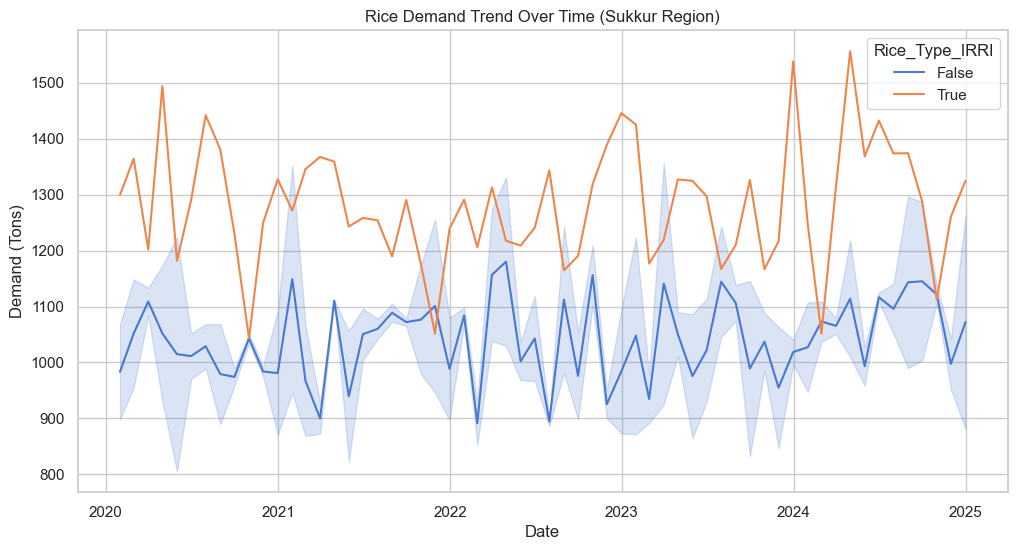

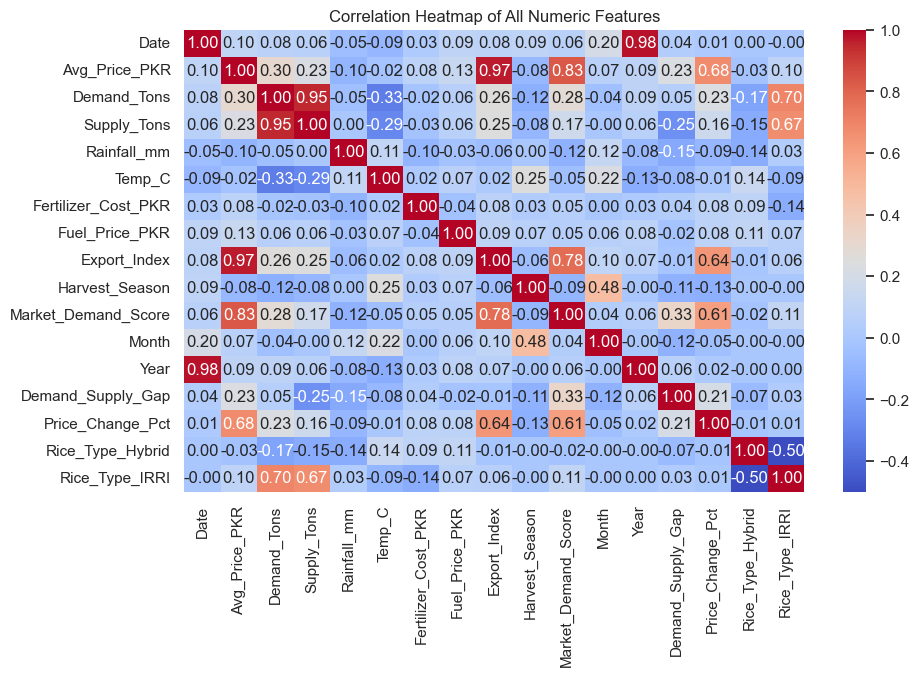

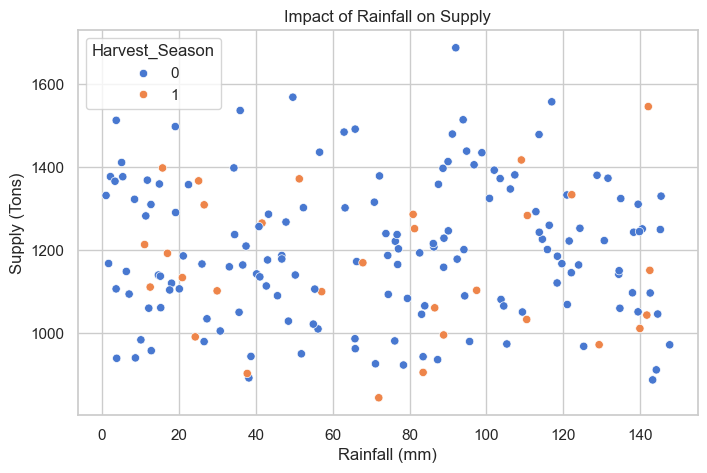

In [5]:
# --- Demand Trend Over Time ---
plt.figure(figsize=(12,6))
sns.lineplot(x='Date', y='Demand_Tons', hue='Rice_Type_IRRI', data=df)
plt.title("Rice Demand Trend Over Time (Sukkur Region)")
plt.xlabel("Date")
plt.ylabel("Demand (Tons)")
plt.show()

# --- Correlation Heatmap ---
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of All Numeric Features")
plt.show()

# --- Relationship: Rainfall vs Supply ---
plt.figure(figsize=(8,5))
sns.scatterplot(x='Rainfall_mm', y='Supply_Tons', hue='Harvest_Season', data=df)
plt.title("Impact of Rainfall on Supply")
plt.xlabel("Rainfall (mm)")
plt.ylabel("Supply (Tons)")
plt.show()

# ==============================================================
# 5️⃣ MODEL TRAINING
# ==============================================================

In [7]:
# Define features (X) and target variable (y)
X = df.drop(['Market_Demand_Score', 'Date'], axis=1)
y = df['Market_Demand_Score']

# Split data into training and testing sets (time-based split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

# Initialize the Random Forest model
model = RandomForestRegressor(
    n_estimators=200,     # number of trees
    random_state=42,      # for reproducibility
    max_depth=8,          # limit depth to avoid overfitting
    n_jobs=-1             # use all CPU cores
)

# Train the model
model.fit(X_train, y_train)

print("✅ Model training completed successfully!")

✅ Model training completed successfully!


# ==============================================================
# 6️⃣ MODEL EVALUATION
# ==============================================================

Mean Absolute Error (MAE): 0.049
R² Score: 0.896


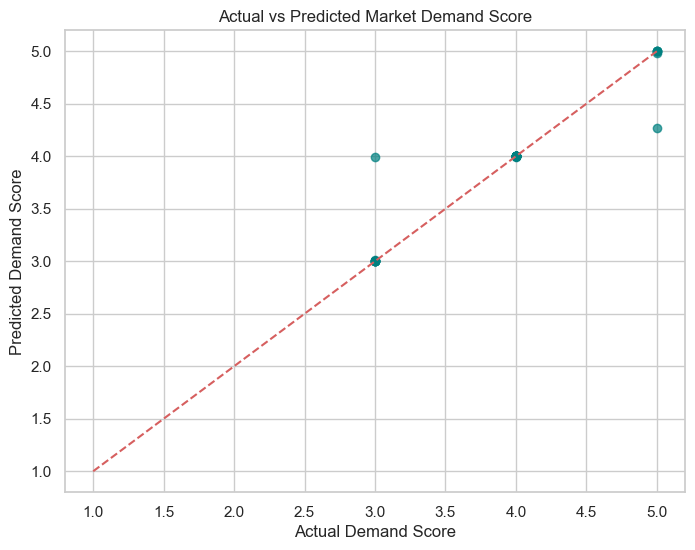

In [8]:
# Make predictions on test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"R² Score: {r2:.3f}")

# --- Actual vs Predicted Plot ---
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7, color='teal')
plt.xlabel("Actual Demand Score")
plt.ylabel("Predicted Demand Score")
plt.title("Actual vs Predicted Market Demand Score")
plt.plot([1,5],[1,5],'r--') # perfect line
plt.show()


# ==============================================================
# 7️⃣ FEATURE IMPORTANCE ANALYSIS
# ==============================================================

C:\Users\Core\AppData\Local\Temp\ipykernel_23704\962752903.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance, palette='viridis')


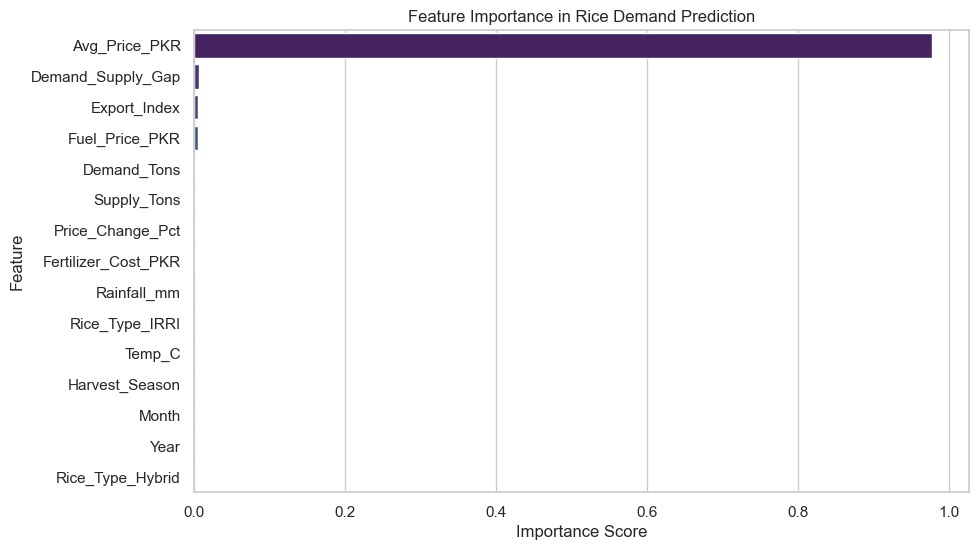

,Feature,Importance
0,Avg_Price_PKR,0.978213
11,Demand_Supply_Gap,0.006713
7,Export_Index,0.005444
6,Fuel_Price_PKR,0.004935
1,Demand_Tons,0.001301
2,Supply_Tons,0.000798
12,Price_Change_Pct,0.000790
5,Fertilizer_Cost_PKR,0.000765
3,Rainfall_mm,0.000441
14,Rice_Type_IRRI,0.000235


In [9]:
# --- Feature Importance Plot ---
importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importance, palette='viridis')
plt.title("Feature Importance in Rice Demand Prediction")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

# Display top 10 most important features
importance.head(10)

In [10]:


# ==============================================================
# 8️⃣ SAVE THE TRAINED MODEL
# ==============================================================

# Save trained model to a file
joblib.dump(model, "rice_demand_model.pkl")
print("💾 Model saved as 'rice_demand_model.pkl'")

# --------------------------------------------------------------
# END OF NOTEBOOK
# Students can now use this model inside Streamlit or Flask app.
# --------------------------------------------------------------


💾 Model saved as 'rice_demand_model.pkl'
